<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_5/CRISP_DM_Approach_for_Heart_Disease_UCI_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: **Business Understanding**
To predict the presence of heart disease in a patient based on health-related factors like age, blood pressure, cholesterol, etc.
Business Impact:

A well-performing model can help health practitioners identify patients at risk of heart disease earlier, improving preventive care.
Key Success Metric:

Accuracy, Precision, Recall, and F1-Score to correctly predict the presence of heart disease.


Step 2: **Data** **Understanding**

Explore the dataset, understand its structure, visualize key patterns, and check for missing values or outliers.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
url = "/content/HeartDiseaseTrain-Test.csv"
df = pd.read_csv(url)

In [ ]:
# Display first few rows
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [ ]:
# Dataset shape and info
print(f"Dataset Shape: {df.shape}")
df.info()

Dataset Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia           

In [ ]:
# Summary statistics of numerical features
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


<ipython-input-44-e16eb99536be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


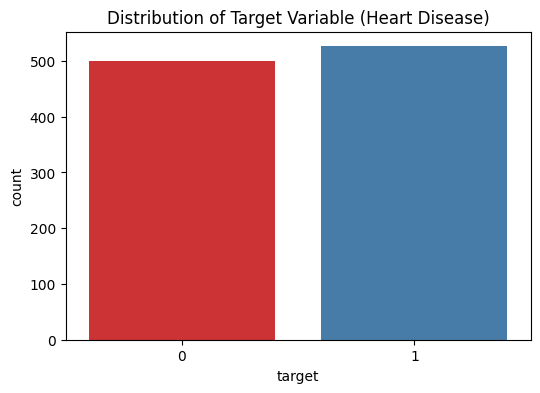

In [ ]:
# Visualize target variable (presence of heart disease)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Distribution of Target Variable (Heart Disease)')
plt.show()

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

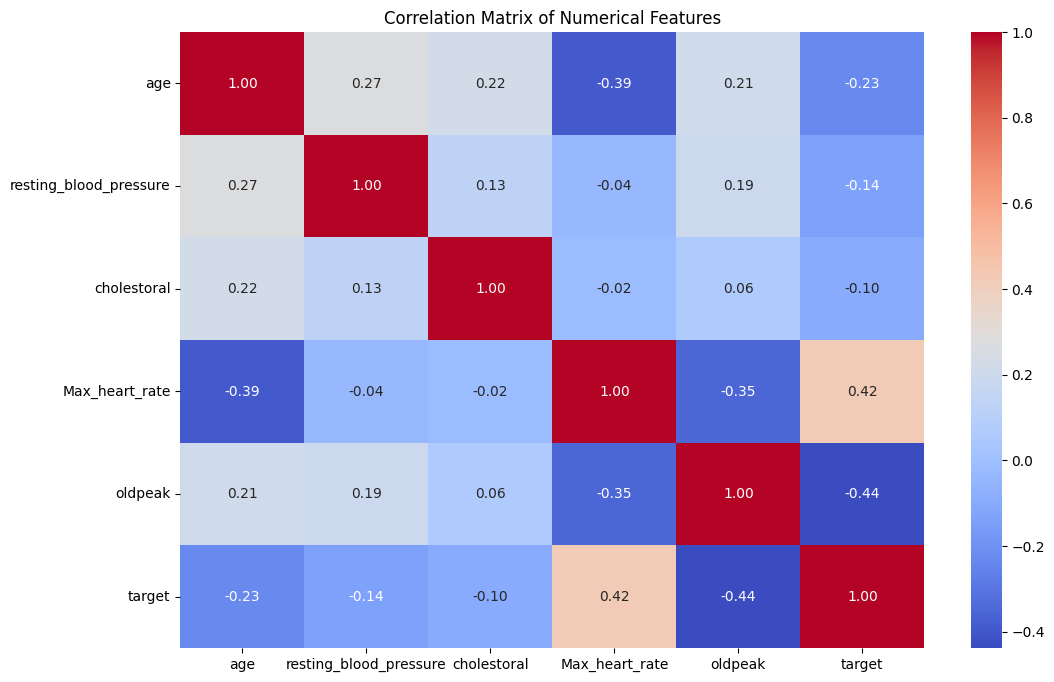

In [ ]:
# Check if there are enough numeric columns to perform correlation
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("Not enough numeric columns to create a correlation matrix.")



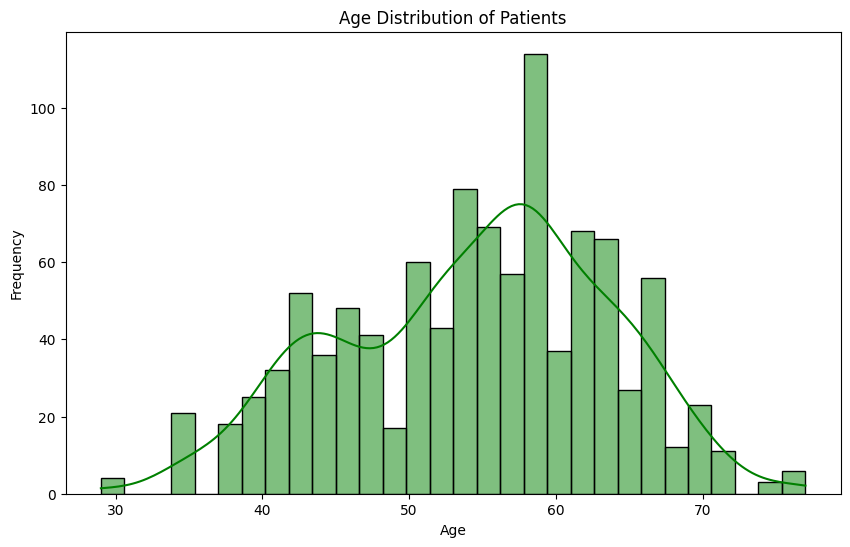

<ipython-input-47-96b74fd1c53c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='cholestoral', data=df, palette='Set3')  # Correct column name


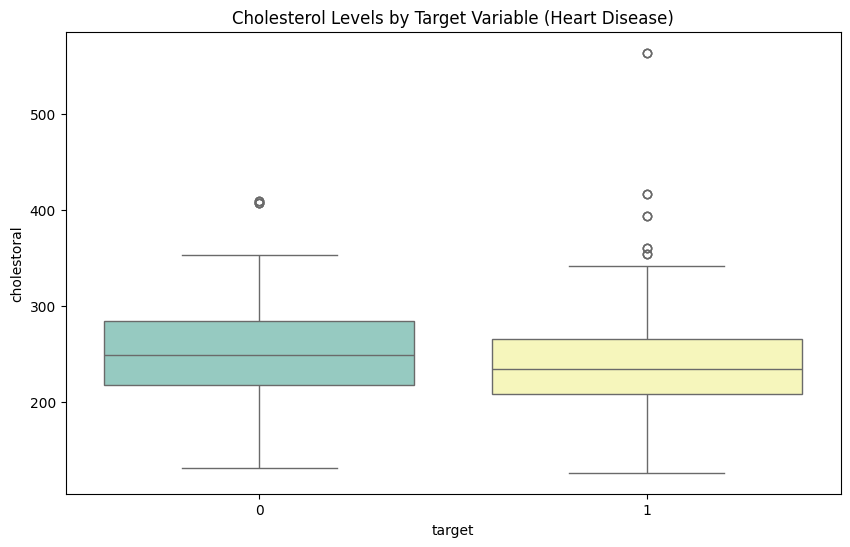

In [ ]:
# Visualizing distributions of key features
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='green')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='cholestoral', data=df, palette='Set3')  # Correct column name
plt.title('Cholesterol Levels by Target Variable (Heart Disease)')
plt.show()


In [ ]:
# Check all the column names in the dataset
print(df.columns)


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


Step 3: **Data** **Preparation**

Handle missing values, encode categorical variables, and scale numerical features.

In [ ]:
# Check for categorical variables and update according to the correct column names
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0}).infer_objects(copy=False)
df['chest_pain_type'] = df['chest_pain_type'].replace({
    'Typical Angina': 0,
    'Atypical Angina': 1,
    'Non-Anginal Pain': 2,
    'Asymptomatic': 3
}).infer_objects(copy=False)
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({'True': 1, 'False': 0}).infer_objects(copy=False)
df['rest_ecg'] = df['rest_ecg'].replace({
    'Normal': 0,
    'ST-T Wave Abnormality': 1,
    'Left Ventricular Hypertrophy': 2
}).infer_objects(copy=False)
df['exercise_induced_angina'] = df['exercise_induced_angina'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df['slope'] = df['slope'].replace({
    'Upsloping': 0,
    'Flat': 1,
    'Downsloping': 2
}).infer_objects(copy=False)
df['thalassemia'] = df['thalassemia'].replace({
    'Normal': 1,
    'Fixed Defect': 2,
    'Reversable Defect': 3
}).infer_objects(copy=False)

<ipython-input-49-648eb08a77ae>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0}).infer_objects(copy=False)
<ipython-input-49-648eb08a77ae>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exercise_induced_angina'] = df['exercise_induced_angina'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
<ipython-input-49-648eb08a77ae>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explic

In [ ]:
# Encoding categorical variables using one-hot encoding (for any remaining categorical variables)
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [ ]:
# Splitting data into training and testing sets (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit and transform on training data, then transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4: **Modeling**

Build and train classification models (Logistic Regression, Random Forest, and XGBoost).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# If you want to make predictions or evaluate models, continue from here
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)


Step 5: **Evaluation**

Evaluate models using classification metrics like accuracy, precision, recall, F1-score, and ROC curve.

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy for each model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


Logistic Regression Accuracy: 0.8000
Random Forest Accuracy: 0.9854
XGBoost Accuracy: 0.9854


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import seaborn as sns

# Helper function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(log_reg, X_test_scaled, y_test)

Logistic Regression:
Accuracy: 0.8000, Precision: 0.7672, Recall: 0.8641, F1-Score: 0.8128
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       102
           1       0.77      0.86      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [ ]:
# Evaluate Random Forest
print("Random Forest:")
evaluate_model(rf_model, X_test_scaled, y_test)

Random Forest:
Accuracy: 0.9854, Precision: 1.0000, Recall: 0.9709, F1-Score: 0.9852
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# Evaluate XGBoost
print("XGBoost:")
evaluate_model(xgb_model, X_test_scaled, y_test)

XGBoost:
Accuracy: 0.9854, Precision: 1.0000, Recall: 0.9709, F1-Score: 0.9852
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



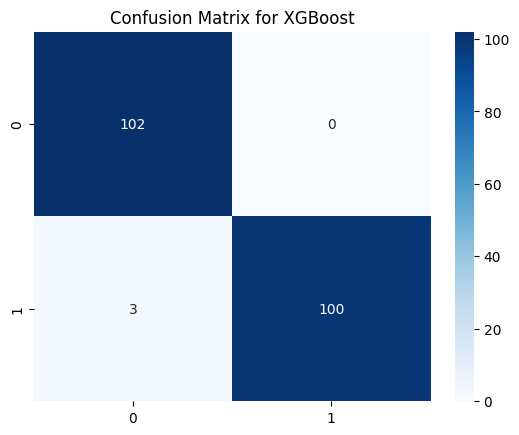

In [ ]:
# Confusion Matrix for XGBoost
import seaborn as sns
import matplotlib.pyplot as plt

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

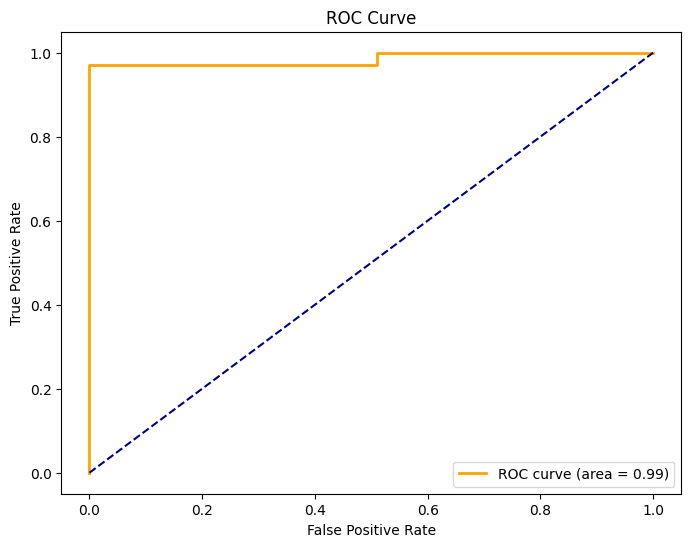

In [ ]:
# ROC Curve for XGBoost
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Step 6: **Deployment**


Save the best-performing model for future use.

In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, 'heart_disease_xgb_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved successfully.")


Model and Scaler saved successfully.


In [ ]:
df['age_cholesterol_interaction'] = df['age'] * df['cholestoral']
df['bp_exercise_interaction'] = df['resting_blood_pressure'] * df['exercise_induced_angina']


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)


In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")


Cross-Validation Accuracy: 0.9841


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf_model),
    ('xgb', xgb_model)], voting='soft')

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)


In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(estimator=log_reg, n_features_to_select=10, step=1)
selector = selector.fit(X_train_scaled, y_train)

print(f"Selected Features: {X_train.columns[selector.support_]}")


Selected Features: Index(['sex', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'slope',
       'chest_pain_type_Typical angina', 'vessels_colored_by_flourosopy_One',
       'vessels_colored_by_flourosopy_Three',
       'vessels_colored_by_flourosopy_Two', 'thalassemia_3'],
      dtype='object')


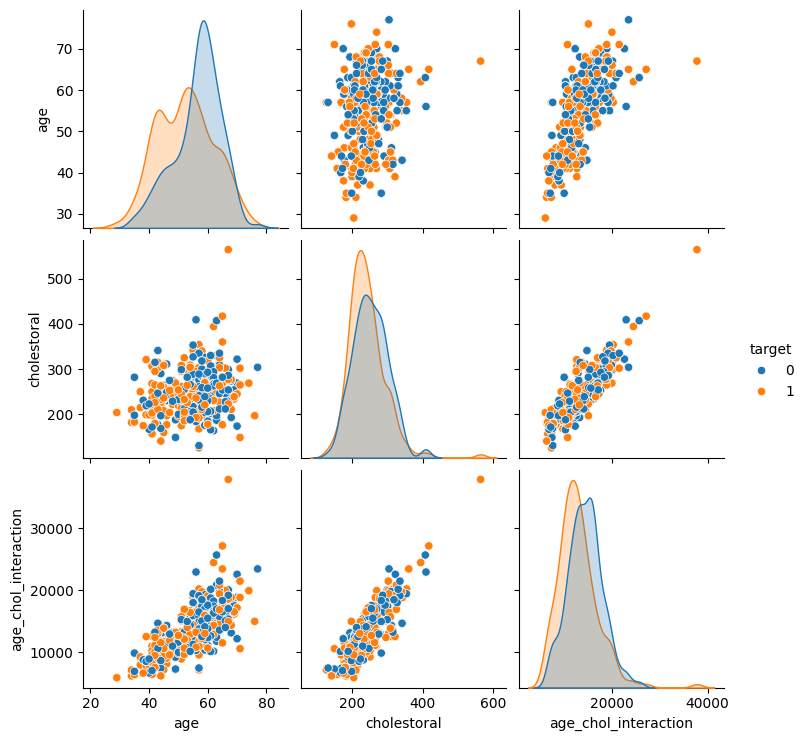

In [ ]:
# Creating interaction feature
df['age_chol_interaction'] = df['age'] * df['cholestoral']

# Visualize pairwise interactions
sns.pairplot(df[['age', 'cholestoral', 'age_chol_interaction', 'target']], hue='target')
plt.show()


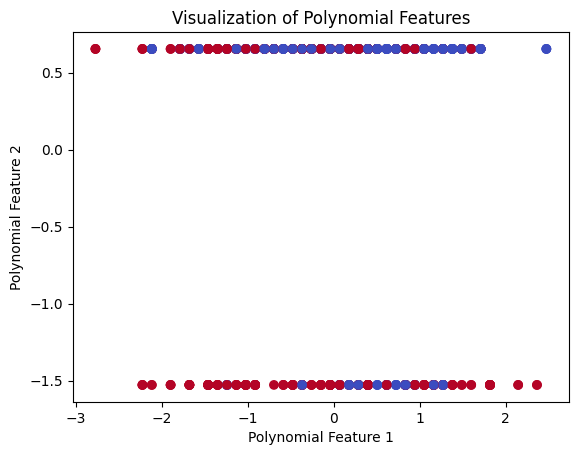

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)

# Plot first two polynomial features
plt.scatter(X_poly[:, 1], X_poly[:, 2], c=y_train, cmap='coolwarm')
plt.title('Visualization of Polynomial Features')
plt.xlabel('Polynomial Feature 1')
plt.ylabel('Polynomial Feature 2')
plt.show()


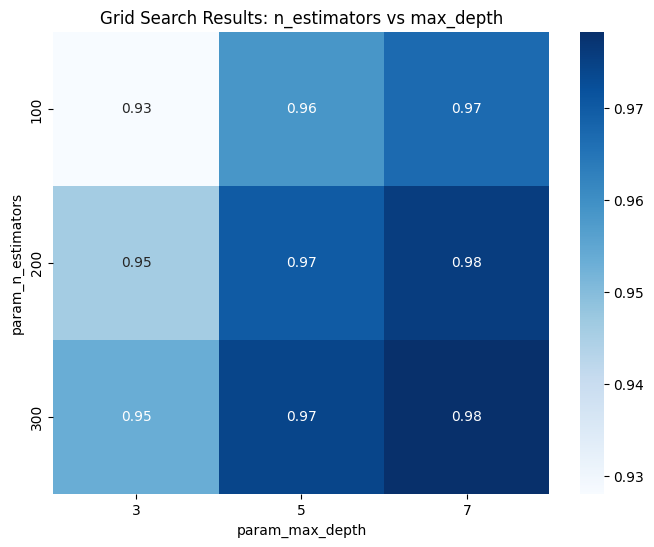

In [ ]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

# Plotting results for n_estimators and max_depth
pivot_table = results.pivot_table(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Grid Search Results: n_estimators vs max_depth')
plt.show()


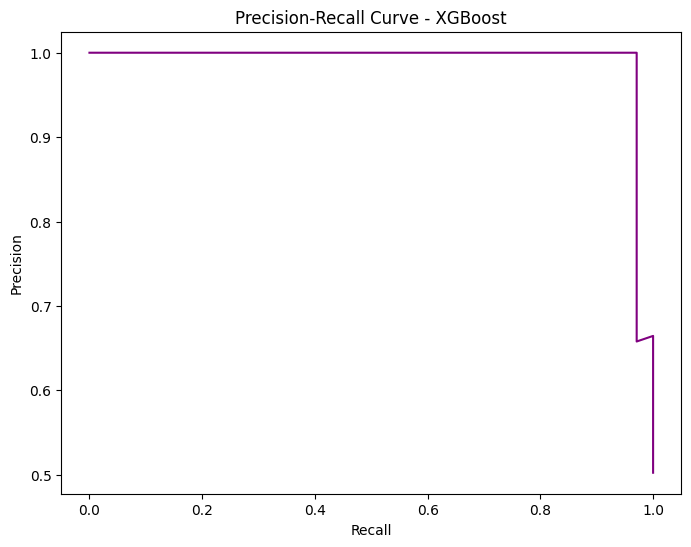

In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-recall curve for XGBoost
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.show()


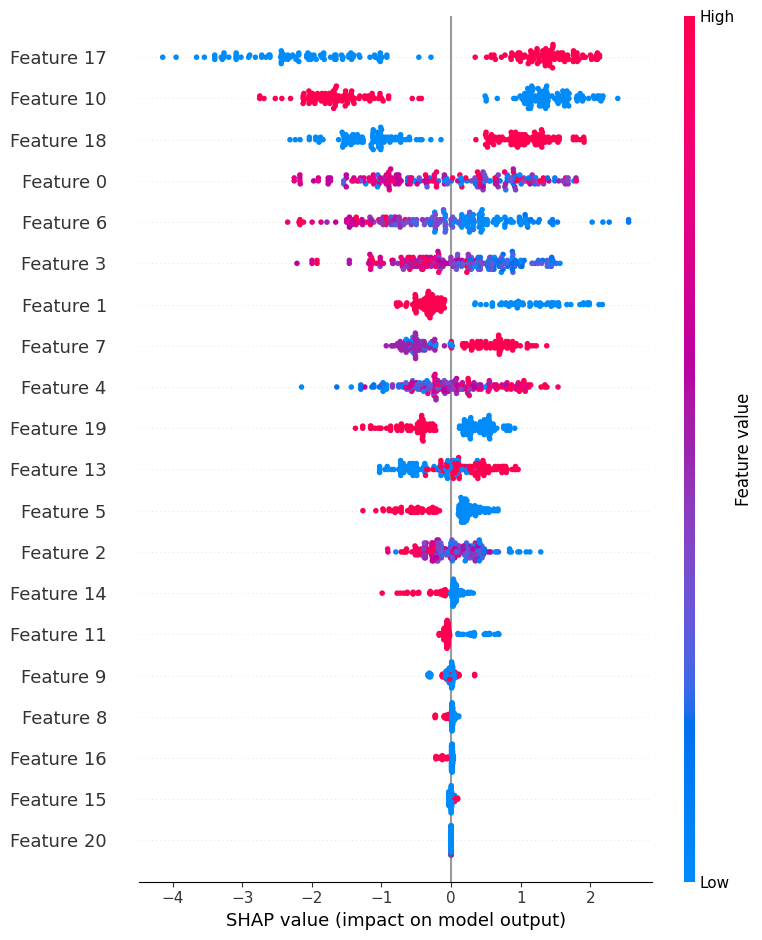

In [ ]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary plot of SHAP values
shap.summary_plot(shap_values, X_test_scaled)
